# LAB 5 - Support Vector Machines

In [1]:
import sys
import sklearn


In [2]:
# Define the default font sizes to make the figures prettier:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "LAB5"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [5]:
X, y = mnist.data, mnist.target

In [6]:
from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = X[:10000], X[10000:], y[:10000], y[10000:]

# SVM Classificaton

## Linear Kernel - linear

### GridSearchCV

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf_linear= SVC(kernel='linear',random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100, 1000]
    }

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_clf_linear, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the best model on the test data
svm_clf_linear_grid_search_best_model = grid_search.best_estimator_
svm_clf_linear_grid_search_best_model_test_score = svm_clf_linear_grid_search_best_model.score(X_test, y_test)
print("Test set score with best parameters: ", svm_clf_linear_grid_search_best_model_test_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'C': 0.1}
Best cross-validation score:  0.9107
Test set score with best parameters:  0.9072666666666667


### RandomizedSearchCV

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

svm_clf_linear= SVC(kernel='linear',random_state=42)

param_dist = {
    'C': uniform(0.01, 100)
}

random_search = RandomizedSearchCV(estimator=svm_clf_linear, param_distributions=param_dist,
                                    n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Evaluate the best model on the test data
svm_clf_linear_random_search_best_model = random_search.best_estimator_
svm_clf_linear_random_search_best_model_test_score = svm_clf_linear_random_search_best_model.score(X_test, y_test)
print("Test set score with best parameters: ", svm_clf_linear_random_search_best_model_test_score)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'C': 37.464011884736244}
Best cross-validation score:  0.9102993682691604
Test set score with best parameters:  0.9072666666666667


## Polynomial Kernel - poly

### GridSearchCV

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf_ploy = SVC(kernel='poly',random_state=42)

# Define the hyperparameter grid for poly cernal
param_grid = {
    'C': [ 1, 10, 100],
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.5, 1.0, 2.0]
}
grid_search = GridSearchCV(estimator=svm_clf_ploy, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [10]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(kernel='poly', random_state=42), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'coef0': [0.0, 0.5, 1.0, 2.0],
                         'degree': [2, 3, 4, 5]},
             verbose=2)

In [11]:
# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

svm_clf_ploy_best_model_grid_search = grid_search.best_estimator_
svm_clf_ploy_best_model_grid_search_test_score = svm_clf_ploy_best_model_grid_search.score(X_test, y_test)
print("Test set score with best parameters: ", svm_clf_ploy_best_model_grid_search_test_score )

Best parameters found:  {'C': 1, 'coef0': 0.5, 'degree': 3}
Best cross-validation score:  0.9606
Test set score with best parameters:  0.9601833333333334


### RandomizedSearchCV

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_dist = {
    'C': uniform(10, 100),
    'degree': [2, 3, 4, 5],
    'coef0': uniform(0.0, 2.0)
    }

random_search = RandomizedSearchCV(estimator=svm_clf_ploy, param_distributions=param_dist,
                                    n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)
# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Evaluate the best model on the test data
svm_clf_ploy_best_model_random_search = random_search.best_estimator_
svm_clf_poly_best_model_random_search_test_score = svm_clf_ploy_best_model_random_search.score(X_test, y_test)
print("Test set score with best parameters: ", svm_clf_poly_best_model_random_search_test_score)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'C': 28.34045098534338, 'coef0': 0.6084844859190754, 'degree': 3}
Best cross-validation score:  0.9602999999999999
Test set score with best parameters:  0.9602


## Radial basis function kernel - rbf

### GridSearchCV

In [13]:
svm_clf_rbf= SVC(kernel='rbf',random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale',1, 0.1, 0.01, 0.001]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_clf_rbf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate the best model on the test data
svm_clf_rbf_grid_search_best_model = grid_search.best_estimator_
svm_clf_rbf_grid_search_best_model_test_score = svm_clf_rbf_grid_search_best_model.score(X_test, y_test)
print("Test set score with best parameters: ", svm_clf_rbf_grid_search_best_model_test_score)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters found:  {'C': 100, 'gamma': 'scale'}
Best cross-validation score:  0.9667999999999999
Test set score with best parameters:  0.96675


### RandomizedSearchCV

In [16]:
from sklearn.model_selection import RandomizedSearchCV
svm_clf_rbf= SVC(kernel='rbf',gamma= 'scale',random_state=42)

param_dist = {
    'C': uniform(0.1, 1000),
    
}

random_search = RandomizedSearchCV(estimator=svm_clf_rbf, param_distributions=param_dist,
                                    n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Evaluate the best model on the test data
svm_clf_rbf_random_search_best_model = random_search.best_estimator_
svm_clf_rbf_random_search_best_model_test_score = svm_clf_rbf_random_search_best_model.score(X_test, y_test)
print("Test set score with best parameters: ", svm_clf_rbf_random_search_best_model_test_score)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'C': 374.6401188473625}
Best cross-validation score:  0.9620997792640692
Test set score with best parameters:  0.96675


# Performance of the SVM with different kernels (Linear, Polynomial, and RBF)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

svm_clf =[svm_clf_linear_grid_search_best_model,svm_clf_linear_random_search_best_model,
          svm_clf_ploy_best_model_grid_search,svm_clf_ploy_best_model_random_search,
          svm_clf_rbf_grid_search_best_model,svm_clf_rbf_random_search_best_model]

# Dictionary to store best models and results
results = {}

for model in svm_clf:
    print(f"\nTraining SVM with {model} kernel...")


    # Evaluate the best model on the test data
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store the results for comparison
    results[model] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'classification_report': classification_report(y_test, y_pred)
    }

    # Print the performance metrics for the current kernel
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Compare results across kernels
print("\nFinal Comparison of Kernels:")
for model in svm_clf:
    print(f"\nKernel: {model}")
    
    print(f"Accuracy: {results[model]['accuracy']:.4f}")
    print(f"Precision: {results[model]['precision']:.4f}")
    print(f"Recall: {results[model]['recall']:.4f}")
    print(f"F1-score: {results[model]['f1_score']:.4f}")


Training SVM with SVC(C=0.1, kernel='linear', random_state=42) kernel...
Accuracy: 0.9073
Precision: 0.9064
Recall: 0.9059
F1-score: 0.9058
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5902
           1       0.94      0.98      0.96      6750
           2       0.88      0.90      0.89      5999
           3       0.87      0.88      0.88      6109
           4       0.89      0.93      0.91      5844
           5       0.89      0.85      0.87      5450
           6       0.94      0.95      0.94      5862
           7       0.92      0.92      0.92      6223
           8       0.90      0.84      0.87      5881
           9       0.89      0.83      0.86      5980

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000


Training SVM with SVC(C=37.464011884736244, kernel='linear', random_state=42

Train SCV model on full data set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
svm_clf_best_model=SVC(kernel='rbf',C= 374.6401188473625, gamma= 'scale', random_state=42)



svm_clf_best_model.fit(X_train,y_train)

y_pred = svm_clf_best_model.predict(X_test)
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')



# Print the performance metrics for the current kernel

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9824
Precision: 0.9824
Recall: 0.9823
F1-score: 0.9823


Training Time - SVM

In [22]:

import time
import pandas as pd
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

tol_svm = 0.1
tols_svm = []
times_svm = []
for i in range(10):
    svm_clf = svm_clf_best_model
    t1 = time.time()
    svm_clf.fit(X_train, y_train)
    t2 = time.time()
    times_svm.append(t2-t1)
    tols_svm.append(tol_svm)
    print(f"Iteration {i}: Tolerance={tol_svm}, Training time={t2 - t1} seconds")
    tol_svm /= 10


Iteration 0: Tolerance=0.1, Training time=123.97677636146545 seconds
Iteration 1: Tolerance=0.01, Training time=309.4712371826172 seconds
Iteration 2: Tolerance=0.001, Training time=407.26712131500244 seconds
Iteration 3: Tolerance=0.0001, Training time=403.4406681060791 seconds
Iteration 4: Tolerance=1e-05, Training time=215.94978761672974 seconds
Iteration 5: Tolerance=1.0000000000000002e-06, Training time=143.23316764831543 seconds
Iteration 6: Tolerance=1.0000000000000002e-07, Training time=131.24337816238403 seconds
Iteration 7: Tolerance=1.0000000000000002e-08, Training time=242.41557574272156 seconds
Iteration 8: Tolerance=1.0000000000000003e-09, Training time=407.37806248664856 seconds
Iteration 9: Tolerance=1.0000000000000003e-10, Training time=330.6722357273102 seconds


In [24]:

tol_sgd = 0.1
tols_sgd = []
times_sgd = []

for i in range(10):
    sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
    t1 = time.time()
    sgd_clf.fit(X_train, y_train)
    t2 = time.time()
    times_sgd.append(t2-t1)
    tols_sgd.append(tol_sgd)
    print(f"Iteration {i}: Tolerance={tol_sgd}, Training time={t2 - t1} seconds")
    tol_sgd /= 10


Iteration 0: Tolerance=0.1, Training time=92.6352744102478 seconds
Iteration 1: Tolerance=0.01, Training time=93.41721487045288 seconds
Iteration 2: Tolerance=0.001, Training time=93.2220299243927 seconds
Iteration 3: Tolerance=0.0001, Training time=93.20080900192261 seconds
Iteration 4: Tolerance=1e-05, Training time=95.4987690448761 seconds
Iteration 5: Tolerance=1.0000000000000002e-06, Training time=94.35633897781372 seconds
Iteration 6: Tolerance=1.0000000000000002e-07, Training time=94.1211507320404 seconds
Iteration 7: Tolerance=1.0000000000000002e-08, Training time=94.34571933746338 seconds
Iteration 8: Tolerance=1.0000000000000003e-09, Training time=94.33580780029297 seconds
Iteration 9: Tolerance=1.0000000000000003e-10, Training time=98.55716371536255 seconds


In [25]:

tol_knn = 0.1
tols_knn = []
times_knn = []

for i in range(10):
    knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
    t1 = time.time()
    knn_clf.fit(X_train, y_train)
    t2 = time.time()
    times_knn.append(t2-t1)
    tols_knn.append(tol_knn)
    print(f"Iteration {i}: Tolerance={tol_knn}, Training time={t2 - t1} seconds")
    tol_knn /= 10


Iteration 0: Tolerance=0.1, Training time=0.08388161659240723 seconds
Iteration 1: Tolerance=0.01, Training time=0.07122802734375 seconds
Iteration 2: Tolerance=0.001, Training time=0.08121919631958008 seconds
Iteration 3: Tolerance=0.0001, Training time=0.11733150482177734 seconds
Iteration 4: Tolerance=1e-05, Training time=0.13068222999572754 seconds
Iteration 5: Tolerance=1.0000000000000002e-06, Training time=0.08932161331176758 seconds
Iteration 6: Tolerance=1.0000000000000002e-07, Training time=0.07873129844665527 seconds
Iteration 7: Tolerance=1.0000000000000002e-08, Training time=0.08241438865661621 seconds
Iteration 8: Tolerance=1.0000000000000003e-09, Training time=0.0833287239074707 seconds
Iteration 9: Tolerance=1.0000000000000003e-10, Training time=0.06790900230407715 seconds


In [26]:

tol_rf = 0.1
tols_rf = []
times_rf = []

for i in range(10):
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    t1 = time.time()
    rf_clf.fit(X_train, y_train)
    t2 = time.time()
    times_rf.append(t2-t1)
    tols_rf.append(tol_rf)
    print(f"Iteration {i}: Tolerance={tol_rf}, Training time={t2 - t1} seconds")
    tol_rf /= 10


Iteration 0: Tolerance=0.1, Training time=24.22854208946228 seconds
Iteration 1: Tolerance=0.01, Training time=25.57831311225891 seconds
Iteration 2: Tolerance=0.001, Training time=23.864118337631226 seconds
Iteration 3: Tolerance=0.0001, Training time=24.474428176879883 seconds
Iteration 4: Tolerance=1e-05, Training time=24.80412530899048 seconds
Iteration 5: Tolerance=1.0000000000000002e-06, Training time=24.38273024559021 seconds
Iteration 6: Tolerance=1.0000000000000002e-07, Training time=24.94633197784424 seconds
Iteration 7: Tolerance=1.0000000000000002e-08, Training time=24.60805320739746 seconds
Iteration 8: Tolerance=1.0000000000000003e-09, Training time=25.185517072677612 seconds
Iteration 9: Tolerance=1.0000000000000003e-10, Training time=24.176761627197266 seconds


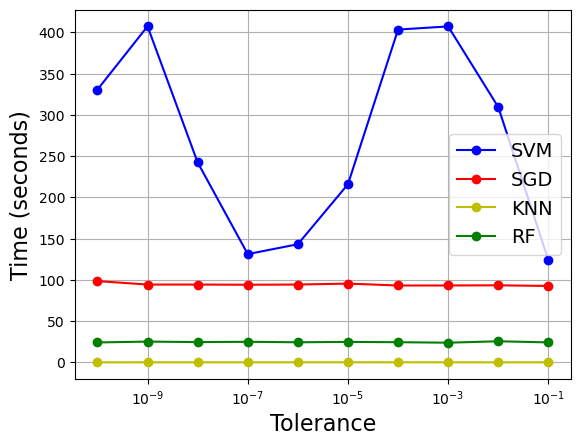

In [34]:

plt.semilogx(tols_svm, times_svm, "bo-",label='SVM')
plt.semilogx(tols_sgd, times_sgd, "ro-",label='SGD')
plt.semilogx(tols_knn, times_knn, "yo-",label='KNN')
plt.semilogx(tols_rf, times_rf, "go-",label='RF')

plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
     

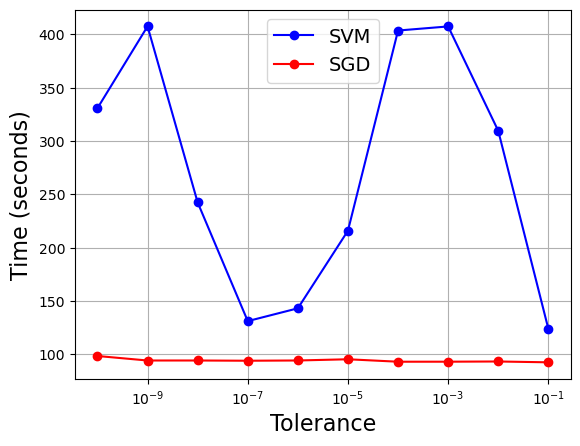

In [35]:
plt.semilogx(tols_svm, times_svm, "bo-",label='SVM')
plt.semilogx(tols_sgd, times_sgd, "ro-",label='SGD')


plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


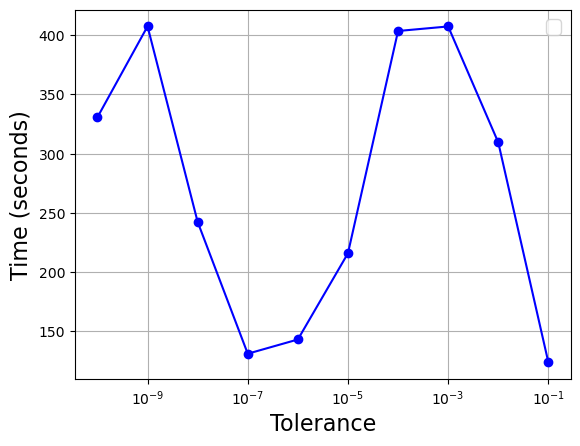

In [30]:
plt.semilogx(tols_svm, times_svm, "bo-")


plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


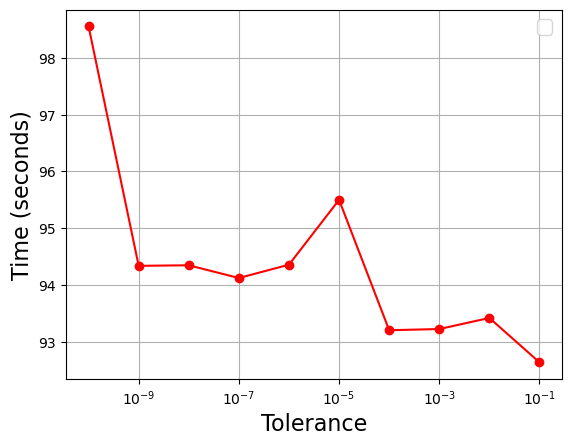

In [31]:

plt.semilogx(tols_sgd, times_sgd, "ro-")


plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


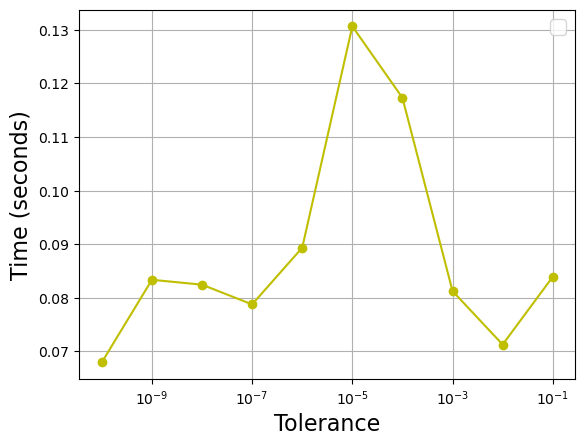

In [32]:

plt.semilogx(tols_knn, times_knn, "yo-")


plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

No handles with labels found to put in legend.


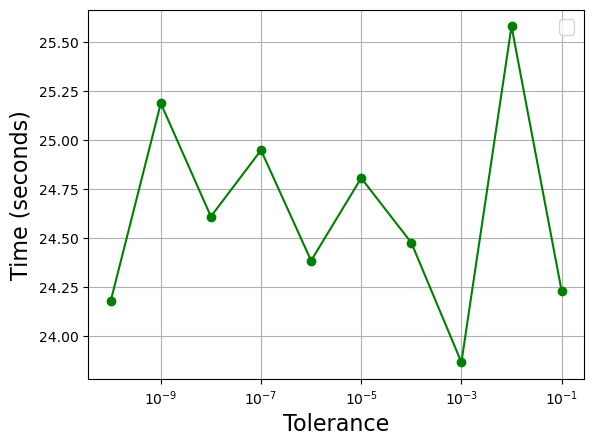

In [33]:

plt.semilogx(tols_rf, times_rf, "go-")

plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:


y_pred = svm_clf.predict(X_test)
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')



# Print the performance metrics for the current kernel

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf_ploy = SVC(kernel='poly',random_state=42)

# Define the hyperparameter grid for poly cernal
param_grid = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.5, 1.0, 2.0]
}
grid_search = GridSearchCV(estimator=svm_clf_ploy, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


model_train_full_dataset=grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = model_train_full_dataset.predict(X_test)
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Store the results for comparison
results[model] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'classification_report': classification_report(y_test, y_pred)
    }

# Print the performance metrics for the current kernel
print(f"\nBest parameters for {model} kernel: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Random Forest training time: 21.3410 seconds
SVM training time: 155.4529 seconds
SGD training time: 78.3247 seconds
k-NN training time: 0.0798 seconds


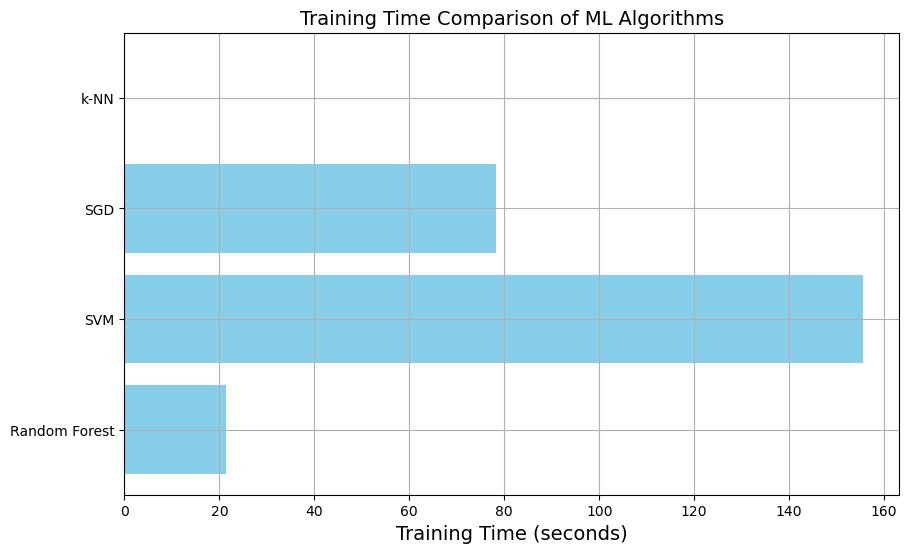

In [36]:
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split



# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf',C= 374.6401188473625, gamma= 'scale', random_state=42),
    "SGD": SGDClassifier(max_iter=1000, tol=1e-3, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=4, weights='distance')
}

# Dictionary to store training times
training_times = {}

# Evaluate training time for each classifier
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)  # Train the model
    end_time = time.time()
    
    training_time = end_time - start_time
    training_times[name] = training_time
    print(f"{name} training time: {training_time:.4f} seconds")

# Plot the training times
names = list(training_times.keys())
times = list(training_times.values())

plt.figure(figsize=(10, 6))
plt.barh(names, times, color='skyblue')  # Horizontal bar chart
plt.xlabel('Training Time (seconds)')
plt.title('Training Time Comparison of ML Algorithms')
plt.grid(True)

# Display the plot
plt.show()